# Plotting with python/matplotlib


### Useful links

pyplot interface tutorial: https://matplotlib.org/users/pyplot_tutorial.html

Other matplotlib tutorials at https://matplotlib.org/users/tutorials.html

Examples: https://matplotlib.org/examples/index.html

Gallery: https://matplotlib.org/gallery/index.html

### Outline of this notebook.

This notebook will take you first through a couple of basic plots (line plot, scatter plot, histogram), and show you how to save those in various output formats. It will then talk a little about customizing the plots (changing colors, sizes etc.) I'll show a few of the basic annotations you can add to plots. It will then touch very briefly on dealing with multiple axes within one figure: multiple subplots, shared axes and parasite axes. 

We'll then discuss plotting FITS images with appropriate coordinates. There are two packages discussed here: APLpy, which makes this very simple, and wcsaxes, which is part of astropy and requires you to be more comfortable with matplotlib.

There is then a list of exercises.

At the end, there are a few advanced snippets provided. These will probably be beyond what we have time to cover in this session, but they should point you in the correct direction in the future.


## Setting up to use matplotlib

If you're inside a jupyter notebook, you should run:

In [2]:
%matplotlib inline

to get inline images. You then need to import matplotlib. Here, I'm using the pyplot interface which provides a nice way to access matplotlib. I'm importing it as ``plt``, so that everything we have imported will start with ``plt.`` . This is a standard convention for using ``matplotlib.pyplot``.

In [3]:
from matplotlib import pyplot as plt
import numpy as np

plt.ion()

## Using matplotlib: basic pyplot usage

The pyplot interface from matplotlib lets you use it in two modes. First, you can call commands like 'plt.plot()', plt.scatter() etc, and it will either add these to the last open figure, or if no figure is open create a new figure. See here for an example of a couple of plots using this, to create a graph with a line and a scatter graph on it, and a histogram. We will also add titles, axis labels and legends.

### Simple plots!
Here is a super-simple plot of some made up data (as lists).

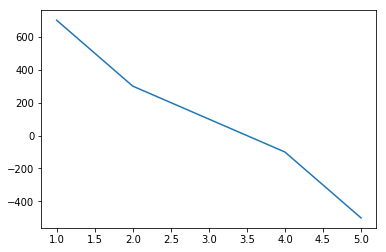

In [4]:
xdata = [1,2,3,4,5]
ydata = [700, 300, 100, -100, -500]
plt.plot(xdata, ydata)

 Simple!
 
Similarly, we can make a scatter plot, and we can also control the appearance of our plots.

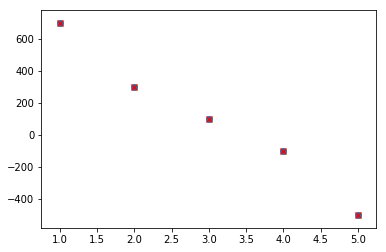

In [5]:
plt.scatter(xdata, ydata)
plt.scatter(xdata, ydata, marker='x', color='red')

We can even scale the color of the markers by another variable if we want:

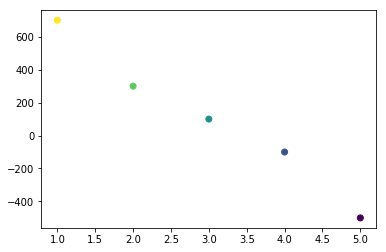

In [6]:
extravariable = [0.5, 0.4, 0.3, 0.2, 0.1]
plt.scatter(xdata, ydata, c=extravariable)

(You can also similarly scale the size)

We can make a pie chart.

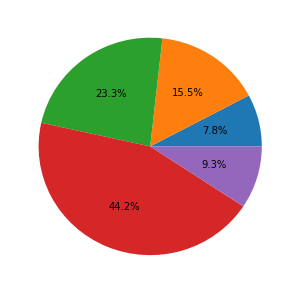

In [7]:
# Make some data and some labels (note)
wedges = [10, 20, 30, 57, 12]

#We have to force a square figure, if we want a round pie chart instead of an oval
plt.figure(figsize=(5,5))

# Plot our pie chart, with automatically labelled wedges.
patches, labels, pcts = plt.pie(wedges, autopct='{:.1F}%'.format)

### Getting more complicated.
There are a lot more chart types available, but lets move onto something more complicated. Normally, you'll probably be plotting numpy array objects instead of lists. Lets set up a couple more plots with those:

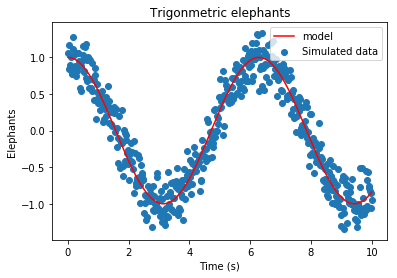

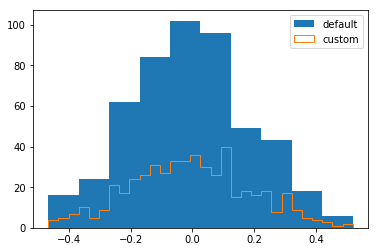

In [8]:
# Make up some data to plot: x points, a cosine, and some noise

# linearly spaced data, from 0 to 10, with 500 points.
xdata = np.linspace(0, 10, 500)
ymodel = np.cos(xdata)
noise =  np.random.normal(0, scale=0.2, size=500)
ydata = ymodel+noise

# Create a scatter plot of the simulated data, as well as a line plot of the original model.
# Also set the label, for automatic legend creation.
plt.scatter(xdata, ydata, label='Simulated data')
plt.plot(xdata, ymodel, label='model', color='red')


# Next, we will set a title, the x and y axis labels, and add a legend.
plt.title('Trigonmetric elephants')
plt.xlabel('Time (s)')
plt.ylabel('Elephants')
plt.legend()

#If we want to send to a new figure, we have to manually call a new one to be created.
plt.figure()

# Now we will create a histogram of our noise, in two different styles.
plt.hist(noise, label='default')
plt.hist(noise, bins=30, histtype='step', label='custom')
plt.legend()

# Save the last figure as a pdf.
plt.savefig('elephants-histogram.pdf')

Note the label= feature and legends.

### Saving figures
As well as the inline figures visible here, we can also save the figure to an output format -- pdf, png, jpeg etc.  See the `plt.savefig` command above. If you're running this in Jupyter, it will be visible from the localhost:888/tree page's list of files. Alternatively, you can see it saved in the directory you ran the notebook in. You could also specify an absolute path on the computer you are running the jupyter server on.

This *simple* mode is very easy to use in interactive mode, but it can sometimes confusing when creating multiple axes within one figure.

### Creating an explicit axis object
When you are creating complex figures, its sometimes easier to explicitly create an 'axis' object, then use the plotting attributes of that axis. These usually have the same name as the ``plt.<command>``used above. If you look at the examples on the matplotlib website, you will find these use a mix of the method above and the one below.

In general, feel free to use whichever method you prefer for this. If you look at documentation and examples, you will probably encounter both methods (as well as examples that don't use the pyplot interface at all).

To demonstrate this second method, we will now create the same two plots as above, but this time we are going to put them in a single figure.. We will explicitly create a *figure* object -- this is the canvas that holds the images -- then create two *axis* object inside that figure, using the ``figure.add_subplot()`` convenience function. We can the plot onto each axis using methods of that axis object. 


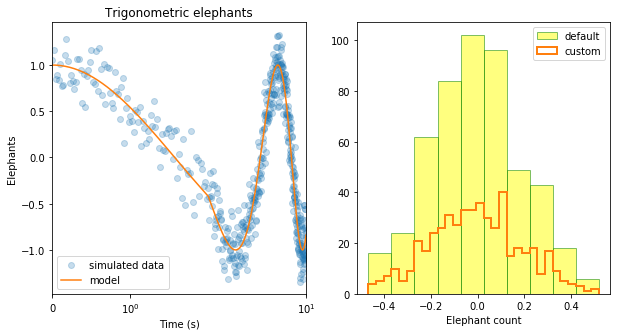

In [9]:
# Create a figure. Here, I've set the size manually as I want a figure wider than it is tall.
fig2 = plt.figure(figsize=(10,5))

# Add an axis object to the figure. In this case, we are going to have space for 2 columns of axes, and one row.
# The syntax for the subplot command is figure.add_subplot(number_rows, number_columns, counter)
ax1 = fig2.add_subplot(1, 2, 1)
ax2 = fig2.add_subplot(1, 2, 2)

# create the first plot, as above
ax1.plot(xdata, ydata, label='simulated data', marker='o', linestyle='None', alpha=0.25)
ax1.plot(xdata, ymodel, label='model', marker=None,)
# Note that here we have used the plot command twice instead of the scatter command once and the plot command once.
# this lets you see the automatic color cycling that occurs -- we don't have to set the color of the second call,
# it automatically cycles through a default series of colors.

# Now set the labels - -note the slight difference in command names
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Elephants')
ax1.set_title('Trigonometric elephants')

# We're going to try something fun here -- a log scale on the xaxis.
# You can choose 'linear', 'log' or 'symlog' for this. 
ax1.set_xscale('symlog')
ax1.legend()




# Now add the second plot (the histogram) to the same figure.
ax2.hist(noise, label='default', edgecolor='green', facecolor='yellow', alpha=0.5)
ax2.hist(noise, bins=30, histtype='step', label='custom', linewidth=2.0)
ax2.legend()
ax2.set_xlabel('Elephant count')

ax1.set_xlim(0,10)
# Save the figure with both plots included.
fig2.savefig('elephants-both.pdf')

When you look at the saved figure, this will have both plots within one image.

### Notes on configuring multiple subplots in one figure:
The subplot method allows a simple grid to be created and used, and is very convenient for side by side images or simple grids. If you need more control, there is the ``gridspec`` methods, or for even more control I'd suggest looking at the ``axes_grid`` toolkit.

## Customizing your plots
You can also manually change the appearance of almost any part of your plot/ You can call plotting commands with specific color options, usually by adding a ``color="colorname"`` to your plot call. You can access the ticks, grids, axes labels annotations and legends and change their colors/sizes/linewidths/fonts etc. You can also manually set the limits of the x and y axis with `plt.xlim / plt.ylim` or `ax.set_xlim`, `ax.set_ylim`.

In general, you can change the appearance of pretty much everything on the plot. To get an idea of the names of all the different parts, look at the image on: https://matplotlib.org/examples/showcase/anatomy.html .




### Using style sheets or the rcParams system.
Style sheets are one of the best ways to consistently change the look of your image -- these let you change the defaults for everything in the ``matplotlib.rcParams`` object. You can change the default font and size, the size and direction of the tick marks, the default compression in your output images, the default color cycle that successive scatter/plot commands will use etc. We don't have time to go into the rcParams system in any detail, but I'll show you how to use the built in style sheets. As always, see the matplotlib examples for more details

You can see the built in styles with:

In [10]:
plt.style.available

['ggplot',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-white',
 'dark_background',
 'seaborn-whitegrid',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-ticks',
 '_classic_test',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-pastel',
 'classic',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-talk',
 'bmh',
 'seaborn']

You can use these styles directly by calling:``plt.style.use('style_name')``.  Alternatively, you can temporarily use one just for a single block of code using a 'context manager'. Don't worry too much about what this is if you've never heard of one, but you can copy the syntax below (note the indentation -- everything in the indented block will use the style set by the 'with' command, everything afterwards which is not in an indented block will not get it).

The example below is just a copy of the commands to make the previous plot -- try some of the built-in styles shown above.

There's also an extra style sheet available as ``plt.xkcd``: try uncommenting that line below (and commenting out the other plt.style.context command) and see what happens!

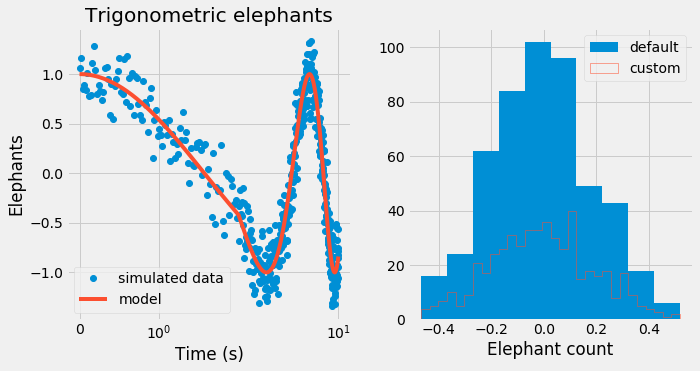

In [11]:

#with plt.xkcd():
with plt.style.context('fivethirtyeight'):
    # Create a figure. Here, I've set the size manually as I want a figure wider than it is tall.
    fig2 = plt.figure(figsize=(10,5))

    # Add an axis object to the figure. In this case, we are going to have space for 2 columns of axes, and one row.
    # The syntax for the subplot command is figure.add_subplot(number_rows, number_columns, counter)
    ax1 = fig2.add_subplot(1, 2, 1)
    ax2 = fig2.add_subplot(1, 2, 2)

    # create the first plot, as above
    ax1.plot(xdata, ydata, label='simulated data', marker='o', linestyle='None')
    ax1.plot(xdata, ymodel, label='model', marker=None,)
    # Note that here we have used the plot command twice instead of the scatter command once and the plot command once.
    # This lets you see the automatic color cycling that occurs -- we don't have to set the color of the second call,
    # it automatically cycles through a default series of colors.

    # Now set the labels - -note the slight difference in command names
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Elephants')
    ax1.set_title('Trigonometric elephants')
    
    # We're going to try something fun here -- a log scale on the xaxis.
    # You can choose 'linear', 'log' or 'symlog' for this. 
    ax1.set_xscale('symlog')
    ax1.legend()


    # Now add the second plot (the histogram) to the same figure.
    ax2.hist(noise, label='default')
    ax2.hist(noise, bins=30, histtype='step', label='custom')
    ax2.legend()
    ax2.set_xlabel('Elephant count')
    fig2.savefig('elephants-both.pdf')
    


## Text and annotations.
All of the text on the images (axis labels, titles, figure titles) can include latex math formatting, using the normal `$ $` syntax. 
You can also add other text using the ``ax.text`` or ``plt.text`` command. This lets you add text to arbitrary points, defined either as the data points, or as a fraction of the axis, through the ``transform=`` keyword.

Also of use is the ``ax.annotation`` command. This lets you draw an arrow from a specific point (e.g. defined in axis coordinates), to a textual label at a different point. See below for some examples of these commands.


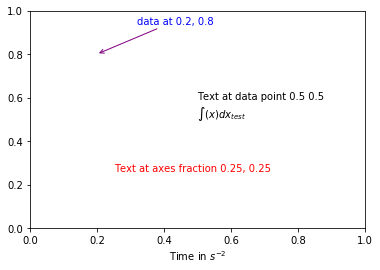

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


# Add an x-axis label containing latex.
ax1.set_xlabel('Time in $s^{-2}$')

# Adding textual annotations!

#1. add a string to a point defined by a data position, using latex and a new line character
ax1.text( 0.5, 0.5, 'Text at data point 0.5 0.5\n$\int(x)dx_{test}$')

#2. Add a string to a position defined by a fraction of the axes, using the 'transform' keyword.
ax1.text(0.25, 0.25, 'Text at axes fraction 0.25, 0.25', color='red',
         transform=ax1.transAxes, ha='left', va='bottom')

#3. Annotate a point with an arrow pointing to a specific data point,
#with a textual label defined as a certain number of pixels away.
ax1.annotate('data at 0.2, 0.8', (0.2, 0.8), xytext=(40,30), xycoords='axes fraction',
             textcoords='offset pixels', ha='left', arrowprops={'arrowstyle':'->', 'color':'purple'},color='blue')


## Shared axes

Shared axes are when you have two plots, but they are actually plotting the same value on at least one of their axes. By linking them with a sharedx or shared y axis, this means that commands setting the limits, interaticvely zooming in etc. will automatically apply to both of them.

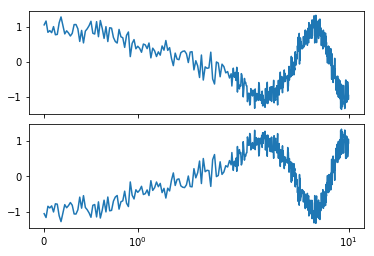

In [13]:
# Shared axes.
fig = plt.figure()

# Here's another way of getting subplots! This returns a list of all your axes.
#here we are ensuring the x axis is shared between them
fig, axes = plt.subplots(2, 1, sharex=True)

# Plot our x and y data
axes[0].plot(xdata, ydata)
axes[1].plot(xdata, -ydata)
fig.subplots_adjust(hspace=0.1)

# Now if we change the xaxis to be a symlog scale, both axes will change.
axes[0].set_xscale('symlog')

## Parasite  or twinned Axes
Even more advanced. Parasite axes let you have an extra axis on the same image -- say you wanted to plot speed and elevation of a journey on the same plot, but each with their own units. 

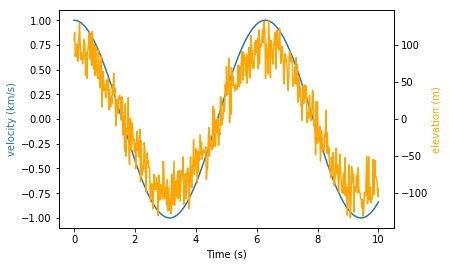

In [14]:
# Create a plot that shows two unrelated values against the same xaxis, each with their own yaxis.
fig = plt.figure()

#Now create an axes object to hold 'velocity' information.
ax_velocity = fig.add_subplot(1, 1, 1)

#Now create a second axes object to hold 'elevation' information.
#The x-axis is the same as the ax_velocity one.
ax_elevation = ax_velocity.twinx()

# Now we plot our 'velocity' and 'elevation' data on the appropriate axis for each one.
ax_velocity.plot(xdata, ymodel, label="Velocity")
ax_elevation.plot(xdata, ydata*100, label="Elevation", color='orange')

# We then use velocity axis to add a legend and xaxis labels.
ax_velocity.set_xlabel('Time (s)')


# Now we use the appropriate axis object to label the velocity and elevation axes.
# We want the color of the label to represent the color in the line, so note how we access that information.
# ax.lines is a list containing all of the lines (from ax.plot) currently on the axis,
# in the order they were plotted.
ax_velocity.set_ylabel('velocity (km/s)', color=ax_velocity.lines[0].get_color())
ax_elevation.set_ylabel('elevation (m)', color=ax_elevation.lines[0].get_color())

# Also look at the axes_grid1 examples -- this has a slightly nicer method of doing this.
# If you are making very complex plots, that will make legends etc easier to do.

You can also have parasite axes that are linked via a transform to another axis -- e.g show both frequency and wavelength on the same plot. This uses the axes_grid1 toolkit, which comes with matplotlib -- see the end of this notebook if you are interested.


## Other types of plots.

Things you can do with matplotlib:
1. Types of charts
  - scatter plots allow you to scale the marker size and color by other variables (see documentation on plt.scatter)
  - scatter/line plots with error bars (``plt.errorbar``)
  - pie charts (``plt.pie``)
  - bar charts (``plt.bar``, ``plt.barh``)
  - images (see below for FITS images, ``plt.imshow``)
  - polar charts (``plt.polar``)
  - vectors/streamplots (``plt.quiver``, ``plt.streamplot``)
  - 2D histograms (``plt.hist2d``)
  - 3D plotting capabilities (see 3D toolkit and examples
 
2. Useful features to add to plots:
  - Vertical and horizontal lines (`plt.vlines`, `plt.axisvline`, `plt.hlines` etc.)
  - Fill between -- good for indicating uncertainties. `plt.fill_between`, `plt.fill_betweenx`
  - Various shapes/polygons -- see `plt.Circle`, `plt.Polygon` etc.
  - Complex custom formatting for tick marks and tick labels -- including datetime handling etc
  - you can use 'zorder' to determine which objects in your plot are 'above' or 'below' other objects.
  - most objects can have an `alpha` value added to them to make them partially transparent.

## Matplotlib Additional Features
There are a lot of other plotting options available in matplotlib -- usually, googling or looking through the examples gallery is one of the best ways to find things. Also please ask during this tutorial if there are specific things you want to know how to do!

There are also often many different ways to produce the same effect in matplotlib. Its okay if you realise later that you weren't using the easiest way, so long as you get something useful!

# Astronomy specific: plotting FITS images.

We're looking at only two of the available methods of doing this:

1. APLpy: very easy interface to produce a plot; only a couple of commands to produce an image of a fits file. Lots of useful convenience functions: add_beam, scale bars etc.
2. wcsaxes: included with astropy. Uses the WCS from a FITS file (or manually created) to create the axes for a matplotlib plot of an image array. A little more work, but also a bit more up-to-date.

(Please note that APLpy and wcsaxes are both maintained by the same person (T. Robitaille), and it looks like APLpy is in the process of being moved over to be based on wcsaxes at the moment.)

If you don't have APLpy, please use ``conda install  -c astropy aplpy`` to install it if you want to try it out.

This note book shows how to create (approximately) the same plot in both. We're going to plot a FITS iamge, and then overlay an outline of a mask (also as a fits image) on top of both.

## APLpy

First we'll do this with APLpy. I've provided a simple data file (from the recent JCMT SCUBA-2 850um legacy release, if you are interested), containing 850um emission from a galactic high mass star forming region, G34.3 .

INFO: Setting slices=[0] [aplpy.core]


INFO: Auto-setting vmin to -2.370e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.187e+00 [aplpy.core]


/usr/local/lib/python3.5/site-packages/aplpy/normalize.py:115: RuntimeWarning: invalid value encountered in less
  negative = result < 0.


INFO: Auto-setting resolution to 112.288 dpi [aplpy.core]


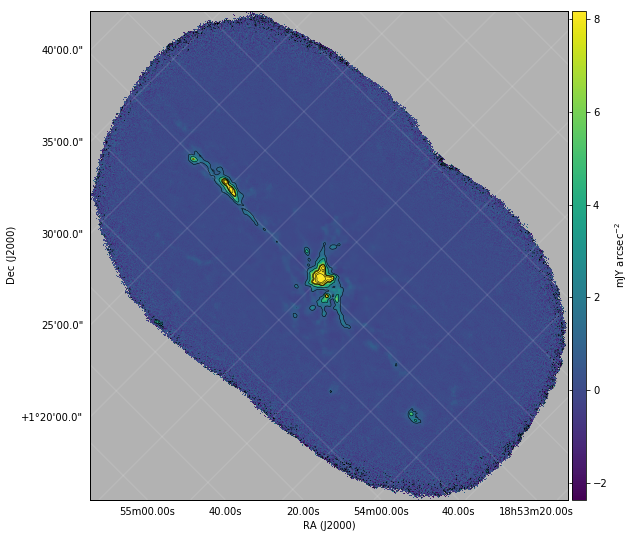

In [15]:
# Aplpy
import aplpy
fitsfile = 'jcmts850um_healpix030318_pub_000.fits'

# 
g34 = aplpy.FITSFigure(fitsfile)
g34.show_colorscale(cmap='viridis')

# You can then change a lot of things about this

#1. Set the empty space (filled with NaN in the datafile) to be gray
g34.set_nan_color('0.7')
g34.add_grid()
g34.grid.set_alpha(0.1)

#Include a colorbar, indicating the data values
g34.add_colorbar()
g34.colorbar.set_axis_label_text('mJY arcsec$^{-2}$')

# Add contours -- here this of the fits file we've already displayed, but you can give another one using the 'data' keyword.
g34.show_contour(levels=[1,3,7,8,9,15, 25], colors='black', linewidths=0.5)

# Save the figure.
g34.save('g34-image-aplpy.pdf')


As you can see, this is very easy to use and just two commands gets you an image of your data. If you're using an interactive mode (e.g. through ipython in a terminal), you can also manually zoom in on parts of your data etc before you save.

Apologies for the warning messages -- APLpy uses some deprecated parts that haven't been updated yet, and this FITS file is in the HPX projection (based on HEALPix), which is a little unusual. With a more normal FITS file you won't see the same issue!

Take a look at the APLpy documentation to see more: http://aplpy.readthedocs.io/en/

### wcsaxes

Now I'm going to use the wcsaxes module built into astropy to make a very similar image. Note that if we weren't trying to produce one similar to the above image, this could be a little shorter, but it still rather more work than using APLpy.

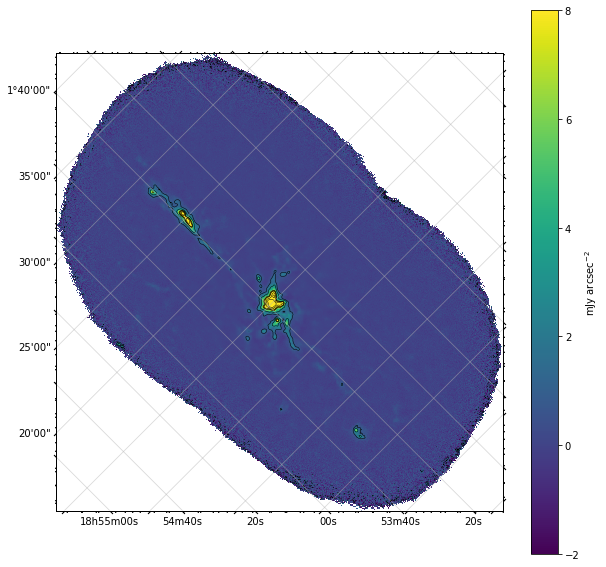

In [16]:
from astropy.visualization import wcsaxes
from astropy.wcs import WCS
from astropy.io import fits
import astropy.units as u

#Get the first HDU of the FITS file as a numpy array.
hdu = fits.open(fitsfile)[0]
wcs = WCS(hdu.header)

# Our image is actually a 3-D cube with a single dimension in the spectral dimension,
# so we will remove that from the wCS and from the data
wcs = wcs.dropaxis(2)
data = hdu.data[0,:,:]

fig = plt.figure(figsize=(10,10))
ax = wcsaxes.WCSAxesSubplot(fig, 1,1,1, wcs=wcs)
fig.add_axes(ax)

#Show the image -- we want to include the data limits to scale to, and also we have to set origin='lower'
# as FITS files set a different pixel origin that matplotlib assumes
image = ax.imshow(data, vmin=-2, vmax=8, origin='lower', interpolation='none')

#Now add a colorbar.
cbar=fig.colorbar(image)
cbar.set_label('mJy arcsec$^{-2}$')

# Add a grid.
ax.grid(color='0.7', alpha=0.5)

# Add contours
ax.contour(data, colors='black', levels=[1,3,7,8,9,15, 25], linewidths=0.5)

# Now change the tick intervals and labels.
ra = ax.coords[0]
ra.display_minor_ticks(True)
ra.set_major_formatter('hh:mm:ss')
# Set tick spacing to 5 minutes of arc (note that we're showing hours and minutes of time here)
ra.set_ticks(spacing=5*u.arcmin)

dec = ax.coords[1]
dec.display_minor_ticks(True)
dec.set_major_formatter('dd:mm:ss')
dec.set_ticks(spacing=5*u.arcmin)

fig.savefig('g34-image-wcsaxes.pdf')

APLpy also builds in a lot of convenience functions, allowing you to overplot catalogues easily, add beams, scalebars etc. You can do all of this with wcsaxes, but you'll have to define more of the details yourself from the basic matplotlib functions. This does allow you more easy control however!

# Additional miscellaneous comments on using matplotlib:

1. For complex scripts with a lot of annotations and similar, you'll it often takes a lot of trial and error to get a publication perfect image. If you're using the terminal version of ipython, you can hover your mouse over an image window and see what the coordinates are -- this can make it a lot easier to add labels/annotations quickly.

2. Advantages of matplotlib (or similar) over gui's for plots: when that one colleague asks for a ton of 'minor' changes you can actually do them quickly, instead of extremely painfully.

4. There are a lot of colormaps built into matplotlib for plotting images -- see https://matplotlib.org/examples/color/colormaps_reference.html , and please use them wisely.


# Matplotlib Exercises

1. plot a sin and a cosine values on the same plot (create the data with numpy).
 * Manually set the color of each line
 * add a legend.
 * Change the x and the y limits of your data (plt.xlim or ax.set_xlim)
 * Annotate an interesting point on your plot using plt.annotate (or ax.annotate)

2. Create some gaussian noise (copy from above using np.random), and create a histogram.
  * Try plotting the same data with different number of bins.
  * Read the documentation for plt.hist (hint: remember the ? feature of ipython!) and try out the different histogram styles and means of changing the appearance.
  
3. Take a look at the matplotlib gallery!  https://matplotlib.org/gallery.html , find a plot you like (or is similmar to one you think you'll have to make) and go through all the code to create it -- check you understand what is going on

# Astronomy specific.

1. Using either aplpy or wcsaxes, create an image of a fits file (there are 3 fits files in the root directory for this tutorial).

 a) Try different color scales -- set the vmin and vmax keywords to set the minimum and maximum value (these are used by the aplpy show_color_scale command, or set in the plt/ax.imshow command if using wcsaxes. You can also change the colormap -- see https://matplotlib.org/examples/color/colormaps_reference.html for the full list.
 
 b) Add different contours of the same image. (If you hav


## Advanced features (not covered in the tutorial)
### Creating mathematically linked axes: wavelength and frequency.

This uses the axes_grid1 toolkit.

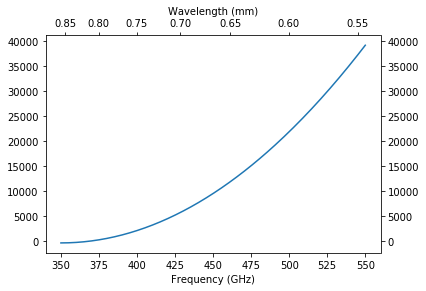

In [17]:


# Secondly we will produce a plot of atmospheric transmission vs wavelength or frequency.
# This requires (?) using the matplotlib axes_grid toolkit.
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1.parasite_axes import SubplotHost

# First we need to define the relationship between wavelength and frequency, as a matplotlib transform.
# This was taken from the https://stackoverflow.com/questions/3148808/python-matplotlib-parasite-twin-axis-scaling
import matplotlib.transforms as mtransforms
import astropy.units as u

class Freq2WavelengthTransform(mtransforms.Transform): 
    input_dims = 1 
    output_dims = 1 
    is_separable = False 
    has_inverse = True 

    def __init__(self):
        mtransforms.Transform.__init__(self)

    def transform_non_affine(self, fr): 
        return (fr*u.GHz).to(u.mm, equivalencies=u.spectral()).value 

    def inverted(self): 
        return Wavelength2FreqTransform() 

class Wavelength2FreqTransform(Freq2WavelengthTransform): 
    input_dims = 1 
    output_dims = 1 
    is_separable = False 
    has_inverse = True 

    def __init__(self):
        mtransforms.Transform.__init__(self)

    def transform_non_affine(self, wl): 
        return (wl*u.mm).to(u.GHz, equivalencies=u.spectral()).value 

    def inverted(self): 
        return Freq2WavelengthTransform() 


# Next we create the transform.
aux_trans = mtransforms.BlendedGenericTransform(Freq2WavelengthTransform(), mtransforms.IdentityTransform())

# Now we have to use some methods from the axes_grid toolkit.
fig = plt.figure()


# We use the SubplotHost to create a new subplot holding our frequency information.
ax_frequency = SubplotHost(fig, 1, 1, 1,)
# now we use the transform defined above to create a twin of the frequency axes.
ax_wavelength= ax_frequency.twin(aux_trans)
#ax_wavelength.set_viewlim_mode("transform")


#We have to explicitly add the frequency subplot onto our figure.
fig.add_subplot(ax_frequency)



# Now we create some frequency data to plot, in mm
xdataf = np.linspace(350, 550, 200)

#And some fake data to plot on the yaxis -- this is meaningless.
ydataf = np.arange(len(xdataf))**2 -450

# Now plot our data.
ax_frequency.plot(xdataf, ydataf)

#Set our x and y labels.
ax_wavelength.set_xlabel('Wavelength (mm)')
ax_frequency.set_xlabel('Frequency (GHz)')